# taq_wang_plot_comparison

#### Juan Camilo Henao Londono - 02.05.2019
#### AG Guhr - Universitaet Duisburg-Essen

File to visualy compare the results

In [1]:
# Modules

import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt

import pickle

import taq_data_tools_comp

__tau__ = 1000

In [10]:
def responses_year(ticker_i, ticker_j, dates):
    """
    Obtain the self- or cross-response function using the midpoint returns 
    and trade signs during different time lags. The data is adjusted to use
    only the values each second. Return an array with the self- or cross-response
    function.
        :param ticker_i: string of the abbreviation of the midpoint stock to
         be analized (i.e. 'AAPL')
        :param ticker_j: string of the abbreviation of the trade sign stock to
         be analized (i.e. 'AAPL')
        :param dates: string with the date of the data to be extracted
         (i.e. '2008-01-02')
    """
    
    responses = np.zeros(__tau__)
    num = 0
    
    # Self response
    if (ticker_i == ticker_j):
    
        for date in dates:

            date_sep = date.split('-')

            year = date_sep[0]
            month = date_sep[1]
            day = date_sep[2]

            try:

                data = pickle.load(open(''.join((
                    '../../../taq_data/article_reproduction_data_{1}/taq_self_response'
                    + '_data/taq_self_response_data_{1}{2}{3}_{0}.pickle')
                    .split())
                    .format(ticker_i, year, month, day), 'rb'))
                
                responses += data
                
                num += 1
                    
            except FileNotFoundError:
                pass
            
    # Cross response
    else:

        for date in dates:

            date_sep = date.split('-')

            year = date_sep[0]
            month = date_sep[1]
            day = date_sep[2]

            try:

                data = pickle.load(open(''.join((
                    '../../../taq_data/article_reproduction_data_{2}/taq_cross_response'
                    + '_data/taq_cross_response_data_{2}{3}{4}_{0}i_{1}j.pickle')
                    .split())
                    .format(ticker_i, ticker_j, year, month, day), 'rb'))

                responses += data
                
                num += 1

            except FileNotFoundError:
                pass                 
    
    return responses / num

In [11]:
# Self response
year = '2008'
ticker = 'AAPL'
dates = taq_data_tools_comp.taq_bussiness_days(year)

s_aapl_juan = responses_year(ticker, ticker, dates)
s_aapl_wang = np.loadtxt('../../../taq_data/article_reproduction_data_{1}/wang/{0}_{0}_{1}_RDC_L={2}.txt'.
                         format(ticker, year, __tau__), usecols=1)

In [12]:
err_s = np.abs(s_aapl_wang[1:] - s_aapl_juan) / s_aapl_wang[1:] * 100
err_avg_s = np.sum(err_s) / len(err_s)
print('The average error between the results is {:.2f}%'.format(err_avg_s))

The average error between the results is 4.80%


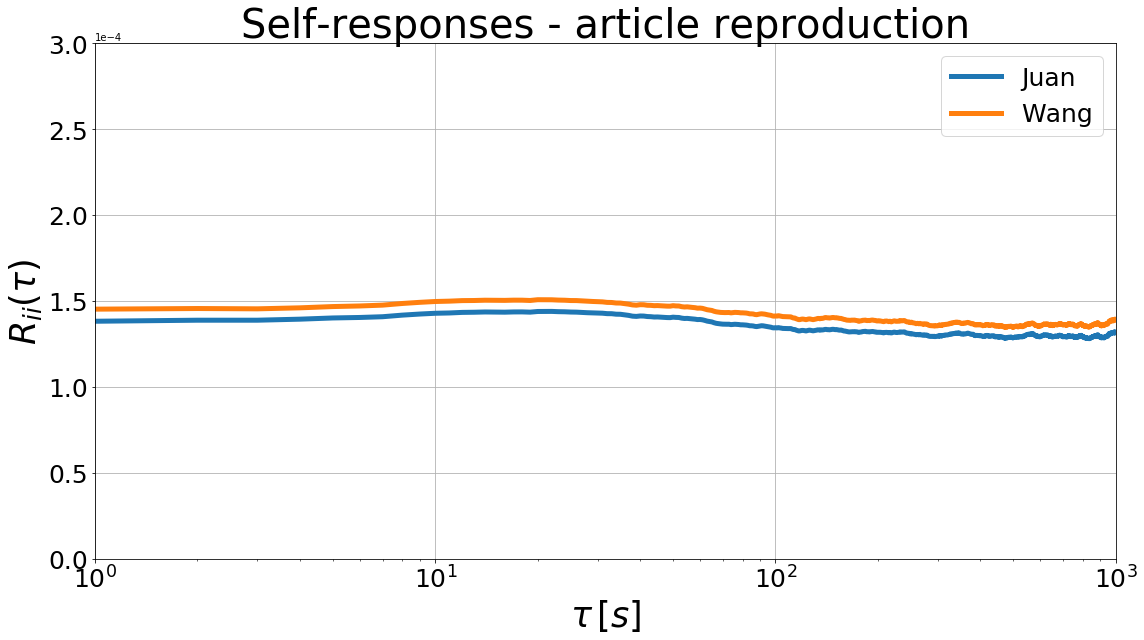

In [13]:
fig = plt.figure(figsize=(16, 9))
plt.semilogx(s_aapl_juan, linewidth=5, label='Juan')
plt.semilogx(s_aapl_wang[1:], linewidth=5, label='Wang')
plt.legend(loc='best', fontsize=25)
plt.title('Self-responses - article reproduction', fontsize=40)
plt.xlabel(r'$\tau \, [s]$', fontsize=35)
plt.ylabel(r'$R_{ii}(\tau)$', fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(1,1000)
plt.ylim(0 * 10 ** -5, 30 * 10 ** -5)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.grid(True)
plt.tight_layout()

In [14]:
# Cross response

year = '2008'
ticker_i = 'AAPL'
ticker_j = 'MSFT'
dates = taq_data_tools_comp.taq_bussiness_days(year)

c_aapl_msft_juan = responses_year(ticker_i, ticker_j, dates)
c_aapl_msft_wang = np.loadtxt('../../../taq_data/article_reproduction_data_{2}/wang/{0}_{1}_{2}_RDC_L={3}.txt'.
                         format(ticker_i, ticker_j, year, __tau__), usecols=1)

In [15]:
err_c = np.abs(c_aapl_msft_wang[1:] - c_aapl_msft_juan) / c_aapl_msft_wang[1:] * 100
err_avg_c = np.sum(err_c) / len(err_c)
print('The average error between the results is {:.2f}%'.format(err_avg_c))

The average error between the results is 14.64%


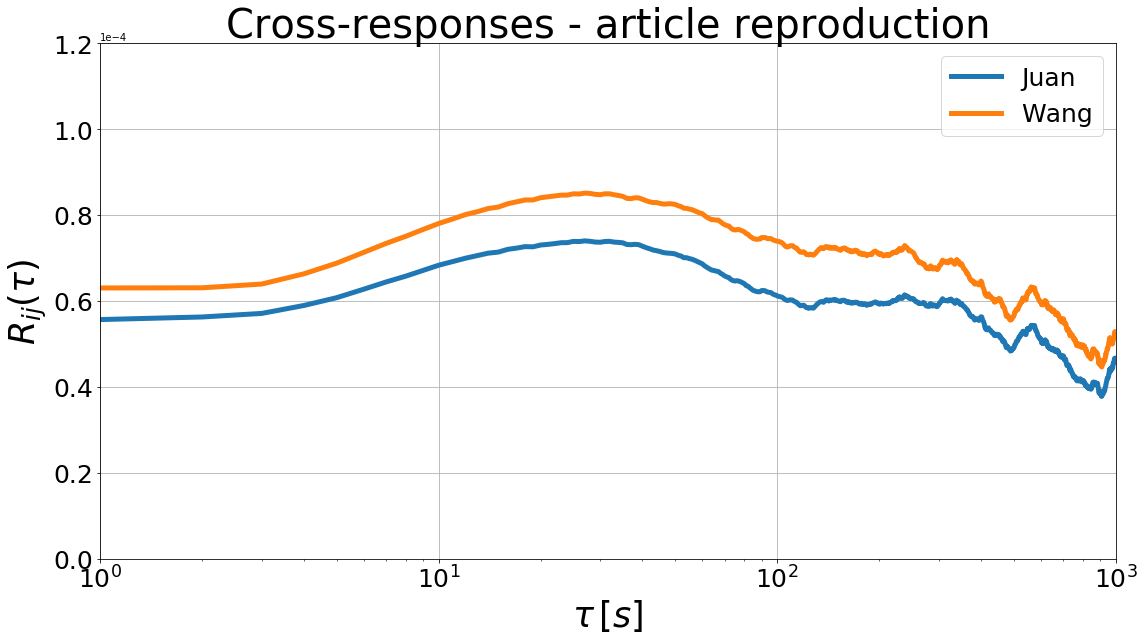

In [20]:
fig = plt.figure(figsize=(16, 9))
plt.semilogx(c_aapl_msft_juan, linewidth=5, label='Juan')
plt.semilogx(c_aapl_msft_wang[1:], linewidth=5, label='Wang')
plt.legend(loc='best', fontsize=25)
plt.title('Cross-responses - article reproduction', fontsize=40)
plt.xlabel(r'$\tau \, [s]$', fontsize=35)
plt.ylabel(r'$R_{ij}(\tau)$', fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(1,1000)
plt.ylim(0 * 10 ** -5, 12 * 10 ** -5)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.grid(True)
plt.tight_layout()